<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-08-02 12:32:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-08-02 12:32:42 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head(10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



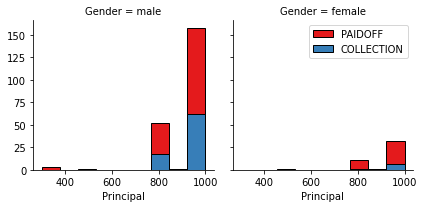

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

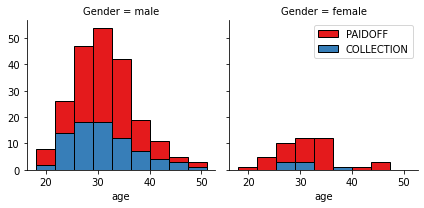

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


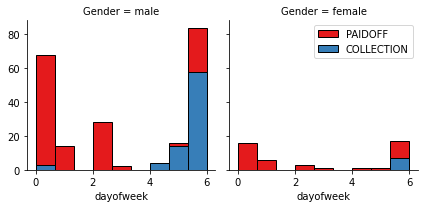

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
d={}

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


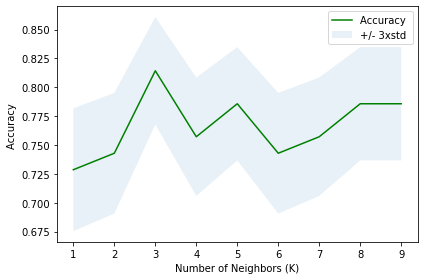

The best accuracy was  0.8143 with k= 3


In [21]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)            #our KNC trained model 
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was ", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 
knc=KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
d['KNeighborsClassifier']=knc

# Decision Tree


In [22]:
# Auxiliary function to calculate the accuracy easier 
def accuracy(clf):
    clf.fit(X_train,y_train)
    preds=clf.predict(X_test)
    acc=metrics.accuracy_score(y_test,preds)
    return acc.round(4)

Text(0.5, 1.0, 'DecisionTreeClassifier  criterion= gini')

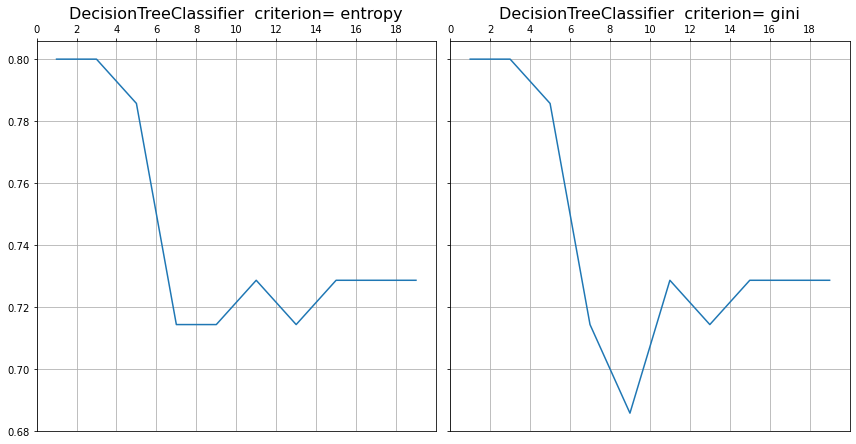

In [23]:
from sklearn.tree import DecisionTreeClassifier

acc=[accuracy(DecisionTreeClassifier(max_depth=i,criterion='entropy',random_state=1)) for i in range(1,20,2)]
acc2=[accuracy(DecisionTreeClassifier(max_depth=i,criterion='gini',random_state=1)) for i in range(1,20,2)]

fig, ax = plt.subplots(1,2,figsize = (12, 6),sharex=True, sharey=True)
plt.xticks(range(0,20,2))
plt.tight_layout()

ax[0].plot(np.arange(1,20,2),acc)
ax[1].plot(np.arange(1,20,2),acc2)
ax[0].grid()
ax[1].grid()
ax[0].xaxis.tick_top()
ax[1].xaxis.tick_top()
ax[0].set_xlim([0,20])

ax[0].set_title('DecisionTreeClassifier  criterion= entropy', size=16)
ax[1].set_title('DecisionTreeClassifier  criterion= gini', size=16)

In [24]:
print('Accuracy for a max_depth=2 and criterion=entropy :', accuracy(DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=1)))
print('Accuracy for a max_depth=2 and criterion=gini :', accuracy(DecisionTreeClassifier(max_depth=2,criterion='gini',random_state=1)))
dtc=DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=1).fit(X_train,y_train)
d['DecisionTreeClassifier']=dtc

Accuracy for a max_depth=2 and criterion=entropy : 0.8
Accuracy for a max_depth=2 and criterion=gini : 0.8


We see that the accuracy decreases when we increase the maximum depth, so we take a DecisionTreeClassifier with max_depth=2 and any criterion

# Support Vector Machine

We will build diferent SV Classifiers with diferent kernels and parameters in order to see which one performs best with our data. 


### Linear

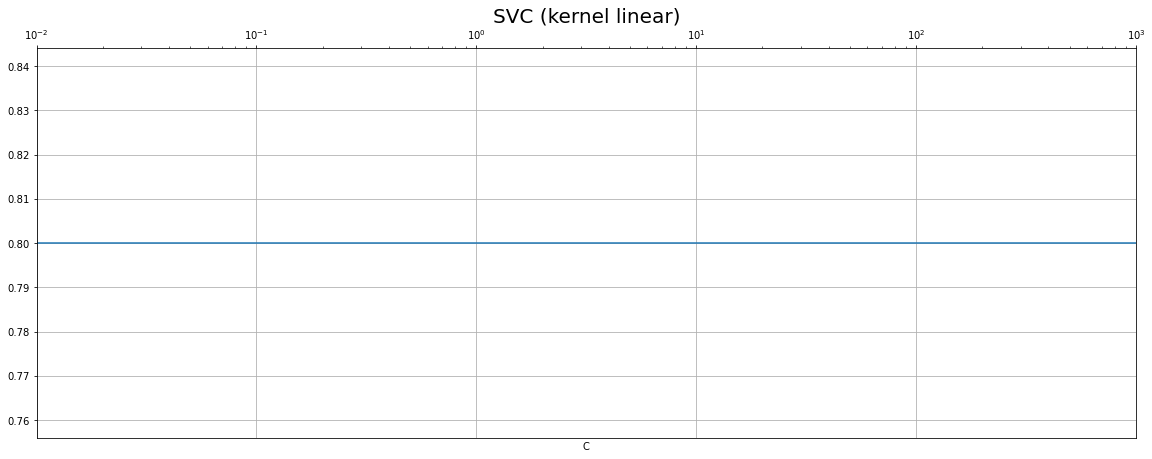

In [25]:
from sklearn.svm import SVC 
acc=[accuracy(SVC(kernel='linear',C=i,random_state=1)) for i in [0.01,0.1,1,10,100,1000]]
fig,ax=plt.subplots(1,1,figsize=(16,6))
plt.tight_layout()
ax.plot([0.01,0.1,1,10,100,1000],acc)
ax.grid()
ax.xaxis.tick_top()
ax.set_xscale('log')
ax.set_xlim([0.01,1000])
ax.set_title('SVC (kernel linear)', size=20)
ax.set_xlabel('C',labelpad=4)
plt.show()

In [26]:

print('Accuracy for the SVC with a linear kernel and C=0.1: ', accuracy(SVC(kernel='linear',C=0.1,random_state=1)))

Accuracy for the SVC with a linear kernel and C=0.1:  0.8


### Poly

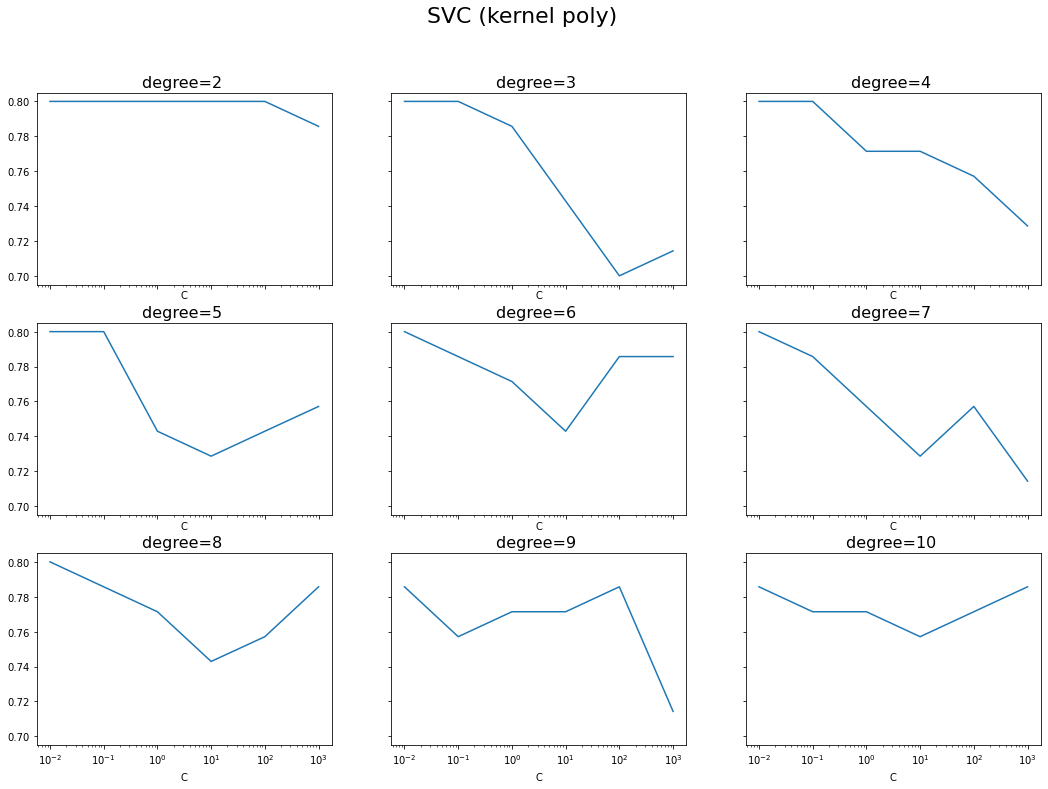

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(18,12),sharex=True,sharey=True)
de=2
for ax_row in axes:
    for ax in ax_row:
        acc=[accuracy(SVC(kernel='poly',degree=de,C=i,random_state=1)) for i in [0.01,0.1,1,10,100,1000]]
        ax.plot([0.01,0.1,1,10,100,1000],acc)
        ax.set_title('degree=%.0f '%(de), size=16)
        ax.set_xscale('log')
        ax.set_xlabel('C',labelpad=6)

        
        de += 1  # Next degree
fig.suptitle('SVC (kernel poly)', size=22)        
plt.show()

In [28]:
print('Accuracy for the SVC with a 2n order polynomial kernel and C=0.1: ', accuracy(SVC(kernel='poly',degree=2,C=0.1,random_state=1)))

Accuracy for the SVC with a 2n order polynomial kernel and C=0.1:  0.8


### Rbf

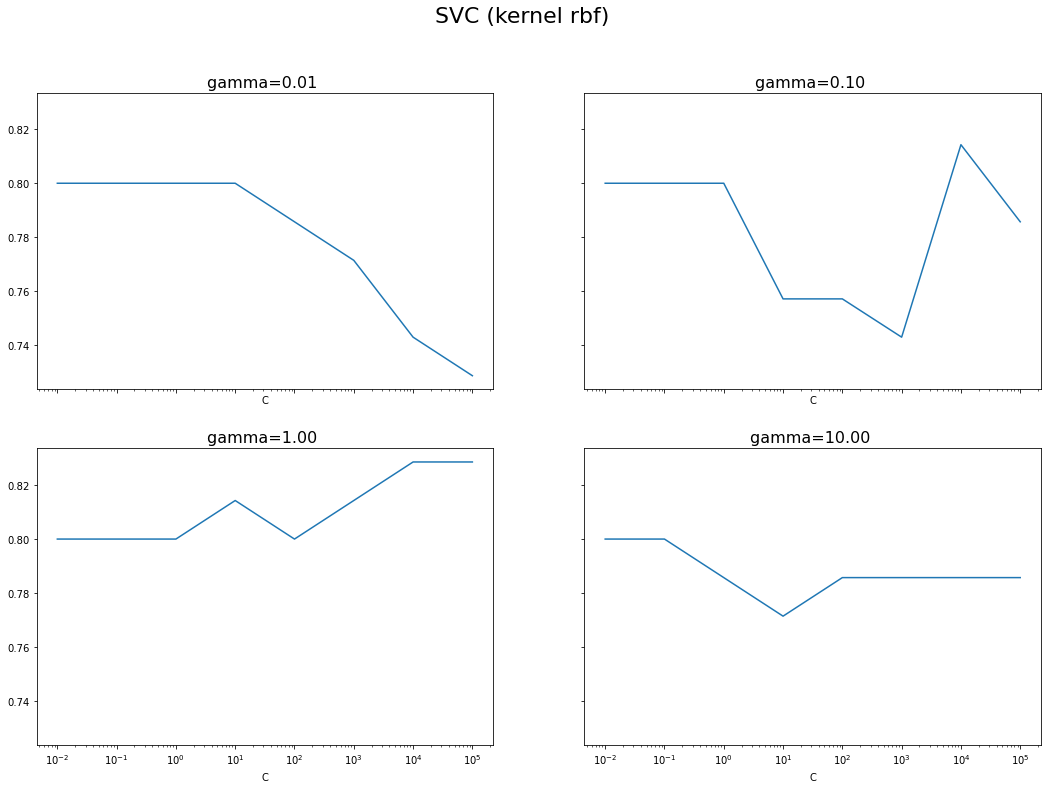

In [29]:
fig, axes = plt.subplots(2,2, figsize=(18,12),sharex=True,sharey=True)
g=0.01
for ax_row in axes:
    for ax in ax_row:
        acc=[accuracy(SVC(kernel='rbf',gamma=g,C=i,random_state=1)) for i in [0.01,0.1,1,10,100,1000,10000,100000]]
        ax.plot([0.01,0.1,1,10,100,1000,10000,100000],acc)
        ax.set_title('gamma=%.2f '%(g), size=16)
        ax.set_xscale('log')
        ax.set_xlabel('C',labelpad=6)
        g=g*10  # Next degree
fig.suptitle('SVC (kernel rbf)', size=22)        
plt.show()

In [30]:
svc=SVC(kernel='rbf',gamma=1.00,C=10000,random_state=1).fit(X_train,y_train)
d['SuportVectorClassifier']=svc
print('Accuracy for the Radial Basis Function with gamma=1.0 and C=10^4: ', accuracy(svc))

Accuracy for the Radial Basis Function with gamma=1.0 and C=10^4:  0.8286


# Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
print('Accuracy for Logistic Regression Classifier with "lbfgs"     solver:',accuracy(LogisticRegression(solver='lbfgs',random_state=1)))
print('Accuracy for Logistic Regression Classifier with "liblinear" solver:',accuracy(LogisticRegression(solver='liblinear',random_state=1)))
print('Accuracy for Logistic Regression Classifier with "sag"       solver:',accuracy(LogisticRegression(solver='sag',random_state=1)))
print('Accuracy for Logistic Regression Classifier with "saga"      solver:',accuracy(LogisticRegression(solver='saga',random_state=1)))
lrc=LogisticRegression(solver='lbfgs',random_state=1).fit(X_train,y_train)
d['LogisticRegressionClassifier']=lrc

Accuracy for Logistic Regression Classifier with "lbfgs"     solver: 0.8143
Accuracy for Logistic Regression Classifier with "liblinear" solver: 0.8
Accuracy for Logistic Regression Classifier with "sag"       solver: 0.8143
Accuracy for Logistic Regression Classifier with "saga"      solver: 0.8143


# Model Evaluation using Test set


In [33]:
from sklearn.metrics import jaccard_score as js
from sklearn.metrics import f1_score as f1
from sklearn.metrics import log_loss as lgl


First, download and load the test set:


In [34]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-08-02 12:33:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-08-02 12:33:36 (99.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [35]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [36]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X2 = Feature
y2 = test_df['loan_status'].values
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
X_test2=X2
y_test2=y2
print ('Test set:', X_test2.shape,  y_test2.shape)

Test set: (54, 8) (54,)


In [37]:
for e in d: 
    pred2=d[e].predict(X_test2)
    print(e)
    print('   Jaccard index = %.4f' %((js(y_test2,pred2,pos_label=0)+js(y_test2,pred2,pos_label=1))/2),'   F1-Score= %.4f' %((f1(y_test2,pred2,pos_label=0)+f1(y_test2,pred2,pos_label=1))/2),sep="\n")
    if e == 'LogisticRegressionClassifier':
        print('   LogLoss =%.4f' %lgl(y_test2,d[e].predict_proba(X_test2)))
    print(" ")

KNeighborsClassifier
   Jaccard index = 0.4103
   F1-Score= 0.5522
 
DecisionTreeClassifier
   Jaccard index = 0.3704
   F1-Score= 0.4255
 
SuportVectorClassifier
   Jaccard index = 0.4558
   F1-Score= 0.5947
 
LogisticRegressionClassifier
   Jaccard index = 0.3704
   F1-Score= 0.4255
   LogLoss =0.4748
 


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.4103  | 0.5522   | NA      |
| Decision Tree      | 0.3704  | 0.4255   | NA      |
| SVM                | 0.4558  | 0.5947   | NA      |
| LogisticRegression | 0.3704  | 0.4255   | 0.4748  |


The best classifier for our data is the **Support Vector Machine** Classifier with a Radial Basis Function kernel with gamma=1.0 and C=10^4

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
|---|---|---|---|
| 2020-10-27 | 2.1 | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27 | 2.0 | Malika Singla | Added lab to GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
